<a href="https://colab.research.google.com/github/naveenkumarch/CE888Lab/blob/main/Lab_6/Clustering_of_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
df_country = pd.read_csv("https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv",delimiter=",")
df_dictonary = pd.read_csv("https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv")

In [ ]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
print(df_dictonary)

  Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending per capita. Given as %ag...
4     imports  Imports of goods and services per capita. Give...
5      Income                              Net income per person
6   Inflation  The measurement of the annual growth rate of t...
7  life_expec  The average number of years a new born child w...
8   total_fer  The number of children that would be born to e...
9        gdpp  The GDP per capita. Calculated as the Total GD...


In [ ]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:

y= df_country['country']
X = df_country.drop('country',axis=1)

In [ ]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Text(0, 0.5, 'income')

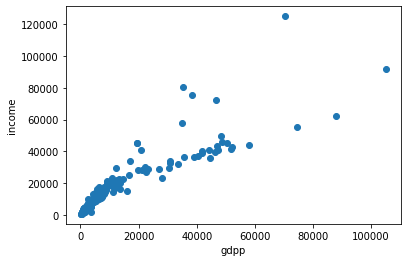

In [ ]:
plt.scatter(df_country['gdpp'],df_country['income'])
plt.xlabel("gdpp")
plt.ylabel("income")

Text(0, 0.5, 'income')

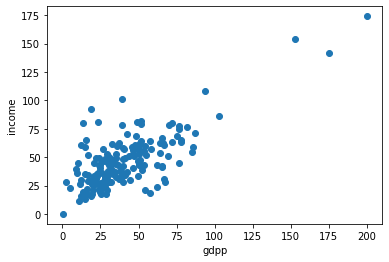

In [ ]:
plt.scatter(df_country['exports'],df_country['imports'])
plt.xlabel("Exports")
plt.ylabel("imports")

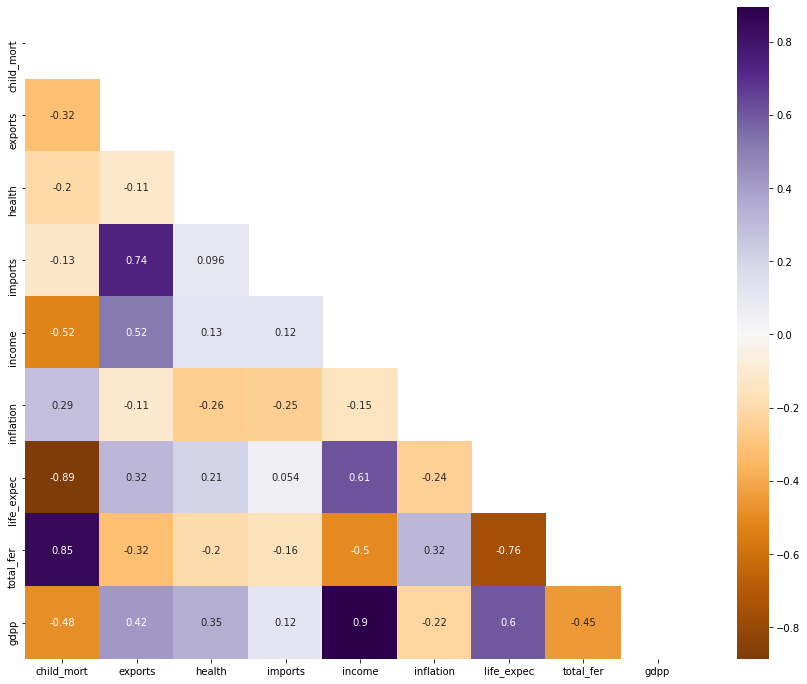

In [ ]:
corr_matrix = X.corr()
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_matrix, mask =mask,cmap='PuOr',annot = True)

In [ ]:
from sklearn import cluster, datasets, metrics

In [ ]:
km=cluster.KMeans(n_clusters=3)
km.fit(X)
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

No handles with labels found to put in legend.


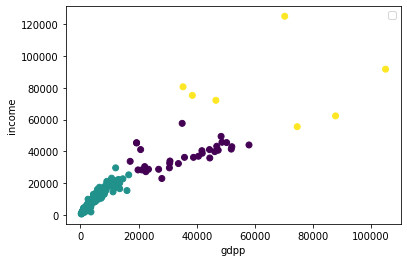

In [ ]:
plt.scatter(df_country['gdpp'],df_country['income'],c= km.labels_)
plt.xlabel("gdpp")
plt.ylabel("income")

Text(0, 0.5, 'imports')

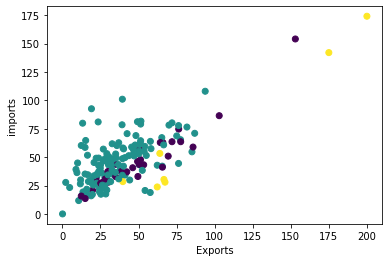

In [ ]:
plt.scatter(df_country['exports'],df_country['imports'],c= km.labels_)
plt.xlabel("Exports")
plt.ylabel("imports")

In [ ]:
Under_dev_country = []
developing_country = []
developed_country = []
for i in range(len(km.labels_)):
  if km.labels_[i] == 0:
    Under_dev_country.append(y[i])
  elif km.labels_[i] == 1:
    developing_country.append(y[i])
  else:
    developed_country.append(y[i])

In [ ]:
print(Under_dev_country)

['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Equatorial Guinea', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Malta', 'Netherlands', 'New Zealand', 'Oman', 'Portugal', 'Saudi Arabia', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'United Arab Emirates', 'United Kingdom', 'United States']


In [ ]:
print(developed_country)

['Brunei', 'Kuwait', 'Luxembourg', 'Norway', 'Qatar', 'Singapore', 'Switzerland']


In [ ]:
print(developing_country)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Mauritania', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongo

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

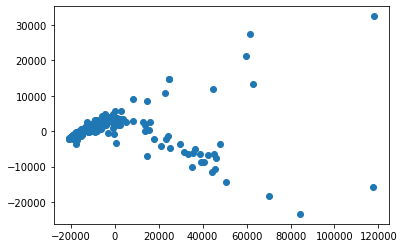

In [ ]:
plt.scatter(X_pca[:,0],X_pca[:,1])

In [ ]:
km_pca=cluster.KMeans(n_clusters=3)
km_pca.fit(X_pca)
km_pca.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

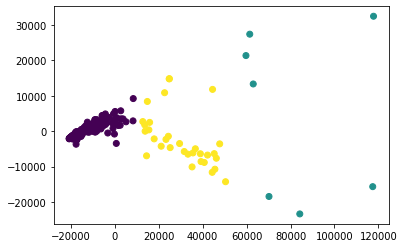

In [ ]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=km_pca.labels_)

In [ ]:
Under_dev_country = []
developing_country = []
developed_country = []
for i in range(len(km_pca.labels_)):
  if km_pca.labels_[i] == 0:
    Under_dev_country.append(y[i])
  elif km_pca.labels_[i] == 1:
    developing_country.append(y[i])
  else:
    developed_country.append(y[i])

In [ ]:
print(Under_dev_country)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Mauritania', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongo

In [ ]:
print(developed_country)

['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Equatorial Guinea', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Malta', 'Netherlands', 'New Zealand', 'Oman', 'Portugal', 'Saudi Arabia', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'United Arab Emirates', 'United Kingdom', 'United States']


In [ ]:
print(developing_country)

['Brunei', 'Kuwait', 'Luxembourg', 'Norway', 'Qatar', 'Singapore', 'Switzerland']
